# Sentiment Analysis on Twitter Data: Exploring Abortion Discourse
by Alan Cheung and Bezawit Ayalew

In this project, we perform sentiment analysis on a Twitter dataset focused on discussions surrounding abortion. Utilizing Python, we employ various natural language processing (NLP) techniques to analyze the sentiment expressed in tweets related to abortion. By processing and classifying the sentiment of these tweets, we aim to gain insights into public opinion and attitudes regarding this sensitive topic.








## Dataset Loading and Cleaning

This section focuses on loading and cleaning Twitter data from a CSV file. It performs operations to remove URLs, mentions, hashtags, extra spaces, leading/trailing spaces, and punctuations from tweet text. It also eliminates duplicate tweets based on text and user ID, and drops rows with empty tweet text.

### Functions:

The following functions are available:

- `clean_text(text)`: Cleans the provided text.
- `clean_tweets()`: Cleans the tweet text in the dataset, removes duplicates based on text and user ID, and drops rows with empty tweet text.
- `display_cleaned_data()`: Displays the first few rows of the cleaned Twitter data.


In [1]:
import pandas as pd
import re

class TweetCleaner:
    def __init__(self, file_path):
        """
        Constructor to initialize the TweetCleaner class.
        :param file_path: Path to the CSV file containing tweet data.
        """
        self.df = pd.read_csv(file_path)
        self.original_df = self.df.copy()  # Stores a copy of the original DataFrame

    def clean_text(self, text):
        """
        Cleans the text of a tweet.
        :param text: The text of the tweet to be cleaned.
        :return: The cleaned text.
        """
        text = text.lower()  # converts text to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
        #text = re.sub(r'\@w+', '', text)  # removes mentions
        text = re.sub(r'\@\w+', '', text)  # removes mentions
        text = re.sub(r'\#\w+', '', text)  # removes hashtags
        text = re.sub(r'\s+', ' ', text)  # replaces multiple spaces with a single space
        text = re.sub(r"^\s+|\s+$", "", text)  # removes spaces at the beginning and at the end of string
        text = re.sub(r'[^\w\s]', '', text)  # removes punctuations
        return text

    def clean_tweets(self):
        """
        Cleans the tweet text in the DataFrame and performs data cleaning operations.
        :return: The cleaned DataFrame.
        """
        self.df['cleaned_text'] = self.df['text'].apply(self.clean_text)
        self.df.drop_duplicates(subset=['cleaned_text', 'hashed_userid'], inplace=True)
        self.df.dropna(subset=['cleaned_text'], inplace=True)
        self.df['tweetcreatedts'] = pd.to_datetime(self.df['tweetcreatedts'])  # Converts to datetime
        return self.df

    def display_cleaned_data(self):
        """
        Displays the cleaned DataFrame and prints the total number of tweets cleaned.
        """
        print(self.df.head())
        print("Total number of tweets cleaned:", len(self.df))
    
    def load_original_data(self):
        """
        Returns the original DataFrame before cleaning.
        :return: The original DataFrame.
        """
        return self.original_df

# Displays and executes cleaning 
if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    cleaner.clean_tweets()
    cleaner.display_cleaned_data()


   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

       tweetcreatedts  ...                                           hashtags  \
0 2022-07-01 06:53:25  ...  [{'text

## Data Preprocessing

This Python code segment performs text preprocessing on tweets stored in a DataFrame. The preprocessing steps include tokenization, stopword removal, and stemming. The `preprocess_text()` function is defined to tokenize the text, remove stopwords, and stem the remaining words. The cleaned DataFrame is then used to apply the `preprocess_text()` function to the 'cleaned_text' column, and the preprocessed text is stored in a new column named 'preprocessed_text'. Finally, the first few rows of the DataFrame with preprocessed text are printed.


In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    """
    Preprocesses the text by tokenizing, removing stopwords, and optionally stemming.
    :param text: The text to be preprocessed.
    :return: The preprocessed text.
    """
    # Tokenizes the text
    tokens = word_tokenize(text)
    
    # Removes stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Joins the tokens back into a string
    return ' '.join(stemmed_tokens)

if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    cleaned_df = cleaner.clean_tweets()

    cleaned_df['preprocessed_text'] = cleaned_df['cleaned_text'].apply(preprocess_text)

    print(cleaned_df.head())


   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

       tweetcreatedts  ...  language favorite_count is_retweet  \
0 2022-07-01 06:53:25  ...        en              

## Exploratory Data Analysis: Visualization and Insights

This segment delves into exploratory data analysis (EDA) through visualization and insights:

1. **Histogram of Text Lengths:** The function `plot_text_length_histogram()` generates a histogram displaying the distribution of tweet text lengths.

2. **Bar Chart of Missing Values:** The function `plot_missing_values_bar_chart()` creates a bar chart illustrating the count of missing values in each column of the dataset.

3. **Duplicate Tweets Handling:** The function `visualize_duplicate_tweets_before_after()` visualizes the number of tweets before and after the removal of duplicate entries. It also calculates and displays the total number of duplicate tweets removed.

4. **Word Cloud Generation:** Two word clouds are generated: one before preprocessing using the original tweet text and another after preprocessing using the cleaned tweet text.

5. **Saving Cleaned Data:** The DataFrame `df2` is created as a copy of the original DataFrame `df`, excluding the column 'cleaned_text'. This cleaned data is then saved to a CSV file named "cleaned_data.csv".

6. **Histogram of Retweet Counts:** A histogram is plotted to visualize the distribution of retweet counts.

7. **Time Series Analysis:** The tweet counts over time are visualized using a time series plot.

8. **Top Languages Bar Plot:** A bar plot displays the top 5 languages used in the tweets.

9. **Histogram of Followers:** A histogram illustrates the distribution of the number of followers.

10. **Summary Statistics:** Summary statistics are calculated and displayed for the number of followers, retweet count, and tweet length.

---



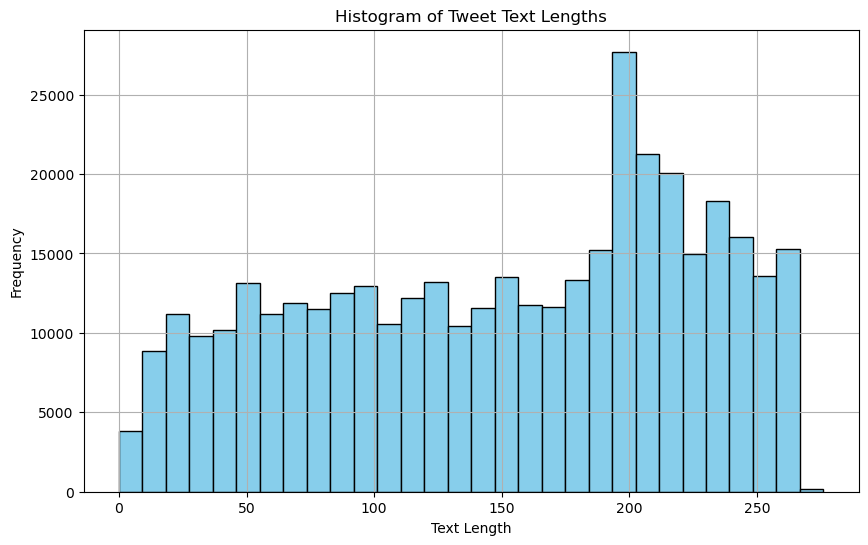

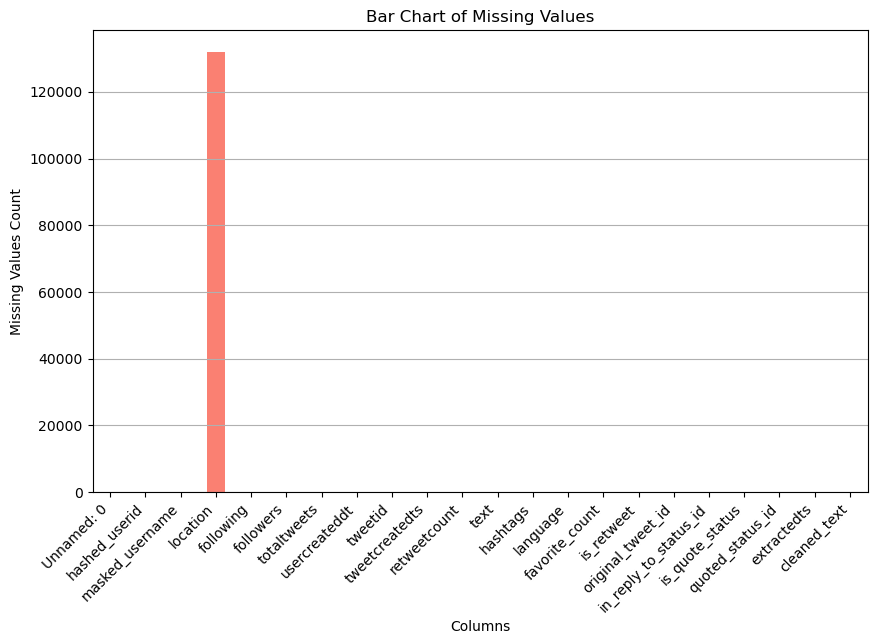

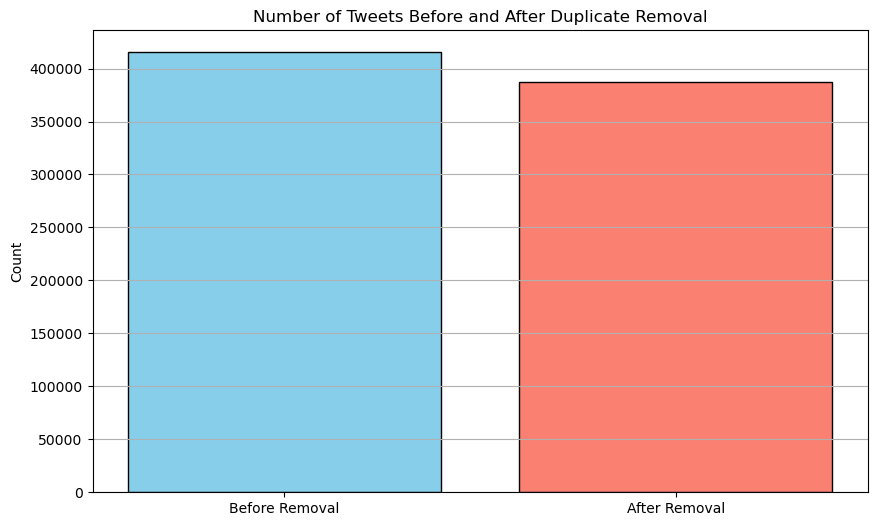

Total duplicate tweets removed: 27665


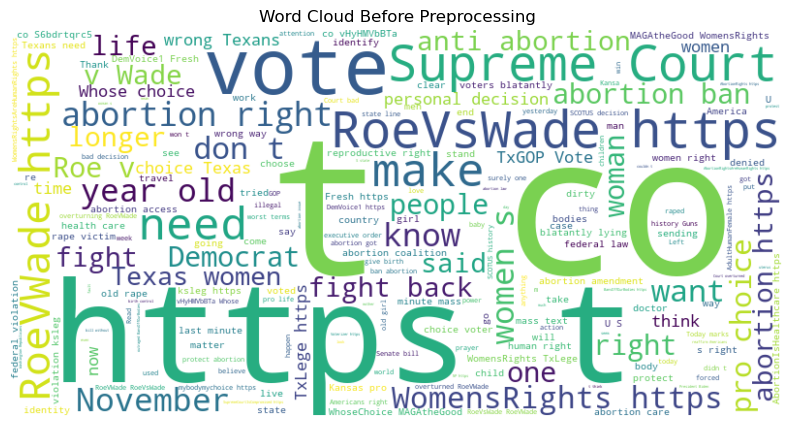

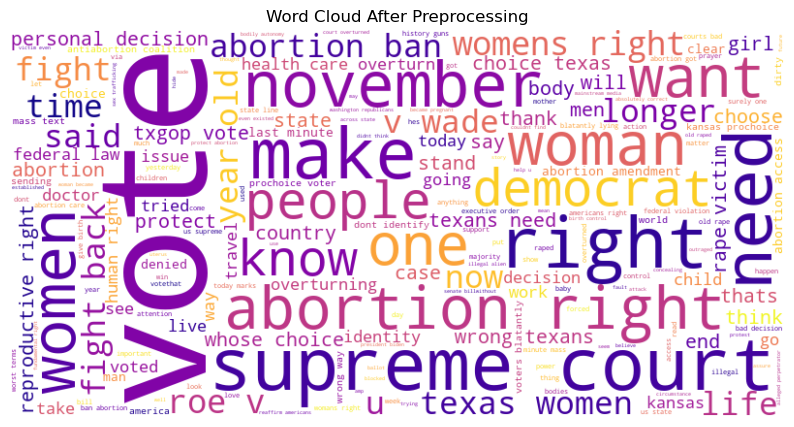

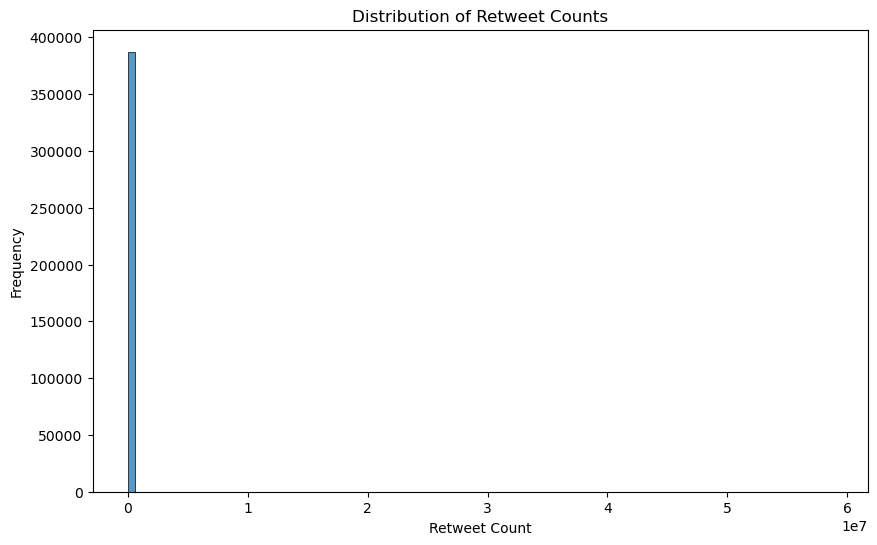

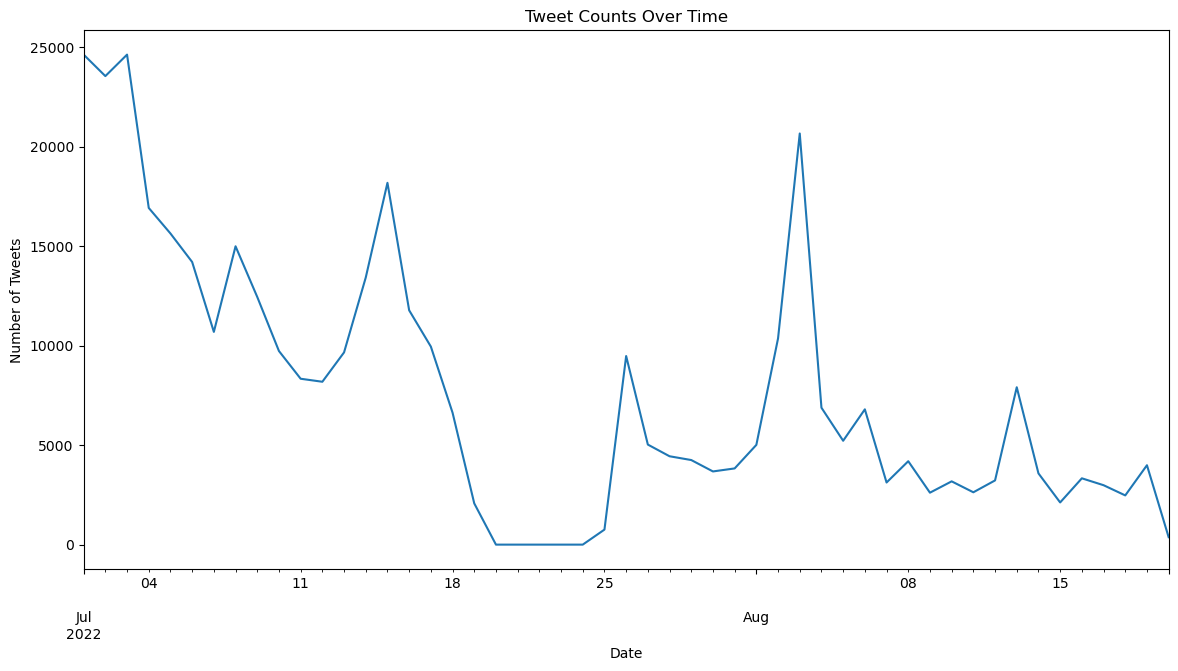

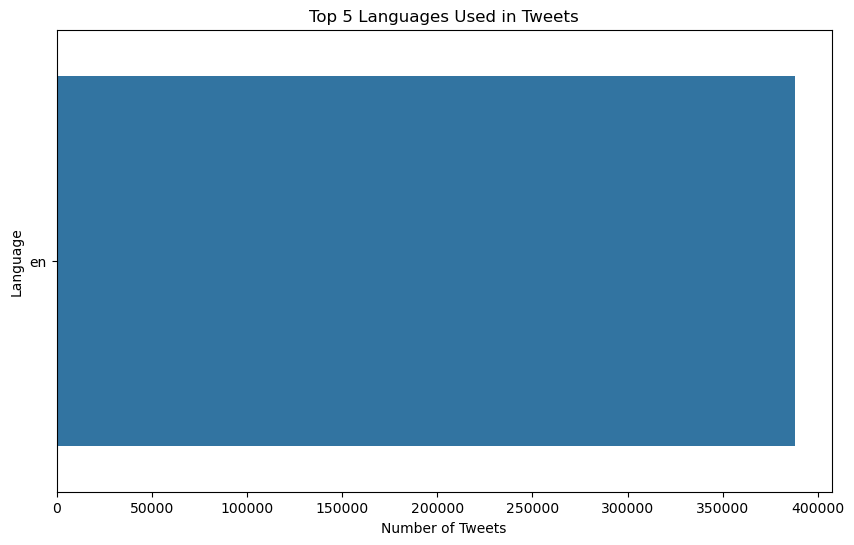

Summary Statistics for Followers:
 count     387707.0
mean        7221.4
std       151108.6
min            0.0
25%          178.0
50%          807.0
75%         3169.0
max     58745067.0
Name: followers, dtype: float64
Total number of entries: 387707


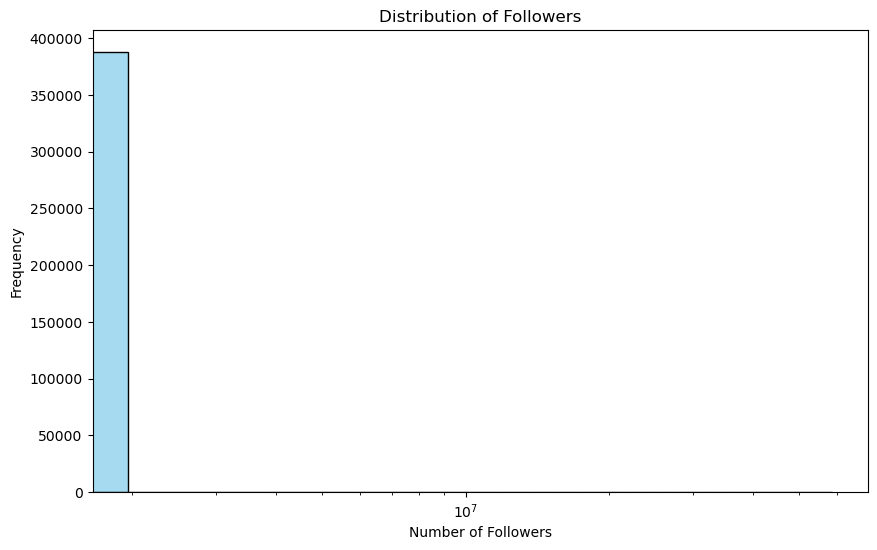

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

class TweetVisualizer:
    def __init__(self, df):
        """
        Constructor to initialize the TweetVisualizer class.
        :param df: DataFrame containing tweet data.
        """
        self.df = df
    
    def plot_text_length_histogram(self):
        """
        Plots a histogram showing the distribution of tweet text lengths.
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.df['cleaned_text'].str.len(), bins=30, color='skyblue', edgecolor='black')
        plt.title('Histogram of Tweet Text Lengths')
        plt.xlabel('Text Length')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    def plot_missing_values_bar_chart(self):
        """
        Plots a bar chart showing the count of missing values in each column of the DataFrame.
        """
        missing_values_count = self.df.isnull().sum()
        plt.figure(figsize=(10, 6))
        missing_values_count.plot(kind='bar', color='salmon')
        plt.title('Bar Chart of Missing Values')
        plt.xlabel('Columns')
        plt.ylabel('Missing Values Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y')
        plt.show()
        
    def visualize_duplicate_tweets_before_after(self, original_df):
        """
        Visualizes the number of tweets before and after removing duplicates.
        :param original_df: Original DataFrame before cleaning.
        """
        total_tweets_before = len(original_df)
        df_cleaned = self.df.drop_duplicates(subset=['cleaned_text', 'hashed_userid'])
        total_tweets_after = len(df_cleaned)
        total_duplicates_removed = total_tweets_before - total_tweets_after

        plt.figure(figsize=(10, 6))
        plt.bar(['Before Removal', 'After Removal'], [total_tweets_before, total_tweets_after], color=['skyblue', 'salmon'], edgecolor='black')
        plt.title('Number of Tweets Before and After Duplicate Removal')
        plt.ylabel('Count')
        plt.grid(axis='y')
        plt.show()
        print(f"Total duplicate tweets removed: {total_duplicates_removed}")

    
    def generate_word_cloud(self, text, title, color):
        """
        Generates and displays a word cloud based on the provided text.
        :param text: Text data for generating the word cloud.
        :param title: Title for the word cloud plot.
        :param color: Color map for the word cloud.
        """
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    
    def plot_retweet_counts_histogram(self):
        """
        Plots a histogram showing the distribution of retweet counts.
        """
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['followers'], bins=100, kde=False)
        plt.title('Distribution of Retweet Counts')
        plt.xlabel('Retweet Count')
        plt.ylabel('Frequency')
        plt.show()
    
    def plot_tweet_counts_over_time(self):
        """
        Plots the number of tweets over time.
        """
        self.df['tweetcreatedts'] = pd.to_datetime(self.df['tweetcreatedts'])
        plt.figure(figsize=(14, 7))
        self.df.resample('D', on='tweetcreatedts').count()['tweetid'].plot()
        plt.title('Tweet Counts Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Tweets')
        plt.show()

    
    def plot_top_languages_bar_chart(self):
        """
        Plots a bar chart showing the top 5 languages used in tweets.
        """
        plt.figure(figsize=(10, 6))
        sns.countplot(y='language', data=self.df, order=self.df['language'].value_counts().iloc[:5].index)
        plt.title('Top 5 Languages Used in Tweets')
        plt.xlabel('Number of Tweets')
        plt.ylabel('Language')
        plt.show()
   
    def plot_followers_distribution(self):
        """
        Plots a histogram showing the distribution of follower counts.
        """
        pd.set_option('display.float_format', '{:.1f}'.format)

        # Summary statistics for the number of followers
        followers_summary = self.df['followers'].describe().round(1)
        print("Summary Statistics for Followers:\n", followers_summary)
        print("Total number of entries:", len(self.df['followers']))
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['followers'], bins=30, kde=False, color='skyblue')
        plt.title('Distribution of Followers')
        plt.xlabel('Number of Followers')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.show()

if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    original_df = cleaner.original_df
    cleaned_df = cleaner.clean_tweets()
    

    visualizer = TweetVisualizer(cleaned_df)
    visualizer.plot_text_length_histogram()
    visualizer.plot_missing_values_bar_chart()
   
    visualizer.visualize_duplicate_tweets_before_after(original_df)
    tweet_text_before_preprocessing = ' '.join(cleaned_df['text'].dropna())
    visualizer.generate_word_cloud(tweet_text_before_preprocessing, 'Word Cloud Before Preprocessing', 'viridis')

    tweet_text_after_preprocessing = ' '.join(cleaned_df['cleaned_text'].dropna())
    visualizer.generate_word_cloud(tweet_text_after_preprocessing, 'Word Cloud After Preprocessing', 'plasma')

    visualizer.plot_retweet_counts_histogram()
    visualizer.plot_tweet_counts_over_time()
    visualizer.plot_top_languages_bar_chart()
    visualizer.plot_followers_distribution()



### Feature Engineering: Text Preprocessing and Vectorization

This cell implements various feature engineering techniques to prepare the text data for sentiment analysis and other tasks:

1. **Negation Handling:** The `handle_negations()` function modifies the preprocessed text to handle negations by appending a special tag to negate the following word.
   
2. **Sentiment Analysis Preparation:** Custom lists of positive and negative words are defined for sentiment analysis.

3. **Sentiment Analysis:** The `assign_sentiment()` function assigns sentiment scores to each tweet based on the presence of positive and negative words.

4. **Vectorization - Bag of Words (BoW):** The `CountVectorizer` from Scikit-Learn converts the text data into a Bag of Words model, which represents text data in numerical form.

5. **Vectorization - TF-IDF:** The `TfidfVectorizer` from Scikit-Learn converts the text data into TF-IDF (Term Frequency-Inverse Document Frequency) representation, which is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.

6. **Word Embeddings with Word2Vec:** The tokenized text is used to train a Word2Vec model, and then each tweet is represented as an average of word vectors. These embeddings capture semantic relationships between words in the text data.

7. **PCA Transformation (Optional):** The PCA (Principal Component Analysis) transformation can be applied to reduce the dimensionality of the word embeddings if needed.

---




In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

def handle_negations(text):
    """
    Handles negations in the text by combining negation words with the subsequent word.
    :param text: The text to handle negations for.
    :return: The text with handled negations.
    """
    negation_words = ['not', 'never', 'no']
    words = text.split()
    words_with_negation = []
    i = 0
    while i < len(words):
        if words[i] in negation_words and i+1 < len(words):
            words_with_negation.append(words[i] + '_' + words[i+1])
            i += 2  # Skips the next word
        else:
            words_with_negation.append(words[i])
            i += 1
    return ' '.join(words_with_negation)

def apply_negation_handling(df, column_name):
    """
    Applies negation handling to a DataFrame column.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column to apply negation handling to.
    """
    df[column_name] = df[column_name].apply(handle_negations)

def assign_sentiment(text, positive_words, negative_words):
    """
    Assigns sentiment scores to the text based on positive and negative words.
    :param text: The text to assign sentiment scores to.
    :param positive_words: List of positive words.
    :param negative_words: List of negative words.
    :return: The sentiment score.
    """
    sentiment_score = 0
    words = text.split()
    for word in words:
        if word in positive_words:
            sentiment_score += 1
        elif word in negative_words:
            sentiment_score -= 1
    return sentiment_score

def apply_sentiment_analysis(df, column_name, positive_words, negative_words):
    """
    Applies sentiment analysis to a DataFrame column.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column to apply sentiment analysis to.
    :param positive_words: List of positive words.
    :param negative_words: List of negative words.
    """
    df['sentiment_score'] = df[column_name].apply(
        lambda text: assign_sentiment(text, positive_words, negative_words)
    )

def vectorize_bag_of_words(df, column_name, max_features=1000):
    """
    Vectorizes text data using Bag of Words representation.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column to vectorize.
    :param max_features: Maximum number of features (words) to consider.
    :return: Bag of Words representation of the text data.
    """
    vectorizer = CountVectorizer(max_features=max_features)
    return vectorizer.fit_transform(df[column_name])

def vectorize_tfidf(df, column_name, max_features=1000):
    """
    Vectorizes text data using TF-IDF representation.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column to vectorize.
    :param max_features: Maximum number of features (words) to consider.
    :return: TF-IDF representation of the text data.
    """
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    return tfidf_vectorizer.fit_transform(df[column_name])

def train_word2vec_model(df, column_name, vector_size=100, window=5, min_count=1, workers=4):
    """
    Trains a Word2Vec model on the text data.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column containing the text data.
    :param vector_size: Dimensionality of the word vectors.
    :param window: Maximum distance between the current and predicted word within a sentence.
    :param min_count: Ignores all words with total frequency lower than this.
    :param workers: Number of CPU cores to use.
    :return: Word embeddings generated by the Word2Vec model.
    """
    tokenized_text = df[column_name].apply(lambda x: x.split())
    word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=vector_size, window=window,
                              min_count=min_count, workers=workers)
    word_vectors = word2vec_model.wv
    word_embeddings = []
    for text in tokenized_text:
        word_embeddings.append(average_word_vectors(text, word2vec_model, word_vectors, vector_size))
    return np.array(word_embeddings)

def average_word_vectors(words, model, vocabulary, num_features):
    """
    Calculates the average word vectors for a list of words.
    :param words: List of words.
    :param model: Word2Vec model.
    :param vocabulary: Vocabulary of the Word2Vec model.
    :param num_features: Dimensionality of the word vectors.
    :return: Average word vectors.
    """
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def assign_sentiment_label(score):
        if score > 0:
            return 'positive'
        elif score < 0:
            return 'negative'
        else:
            return 'neutral'
        
        
from afinn import Afinn

def assign_sentiment(text, afinn):
    """
    Assigns sentiment scores to the text based on the AFINN lexicon.
    :param text: The text to assign sentiment scores to.
    :param afinn: Afinn object for sentiment analysis.
    :return: The sentiment score.
    """
    sentiment_score = afinn.score(text)
    return sentiment_score

def apply_sentiment_analysis(df, column_name, afinn=None, positive_words=None, negative_words=None):
    """
    Applies sentiment analysis to a DataFrame column.
    :param df: The DataFrame containing the text column.
    :param column_name: The name of the column to apply sentiment analysis to.
    :param afinn: AFINN lexicon object.
    :param positive_words: List of positive words.
    :param negative_words: List of negative words.
    """
    if afinn is not None:
        df['sentiment_score'] = df[column_name].apply(lambda text: afinn.score(text))
    else:
        df['sentiment_score'] = df[column_name].apply(lambda text: assign_sentiment(text, positive_words, negative_words))
if __name__ == "__main__":
   
    cleaner = TweetCleaner('twitter_data.csv')
    cleaner.clean_tweets()
    cleaned_df = cleaner.df 

    # Applies negation handling
    apply_negation_handling(cleaned_df, 'cleaned_text')

    afinn = Afinn()

    
    # Applies sentiment analysis using AFINN lexicon
    apply_sentiment_analysis(cleaned_df, 'cleaned_text', afinn)
    
    # Assigns sentiment labels
    cleaned_df['sentiment_label'] = cleaned_df['sentiment_score'].apply(assign_sentiment_label)

    # Finds classes with only one instance
    class_counts = cleaned_df['sentiment_score'].value_counts()
    classes_with_one_instance = class_counts[class_counts == 1].index

    # Filters out instances belonging to classes with only one instance
    filtered_df = cleaned_df[~cleaned_df['sentiment_score'].isin(classes_with_one_instance)]

    # Gets the counts of each class after filtering
    class_counts_after_filtering = filtered_df['sentiment_score'].value_counts()

    # Prints out class counts
    print(class_counts_after_filtering)

    # Vectorizes - Bag of Words
    X_bag_of_words = vectorize_bag_of_words(cleaned_df, 'cleaned_text')

    # Vectorizes - TF-IDF
    X_tfidf = vectorize_tfidf(filtered_df, 'cleaned_text')

    # Trains Word2Vec model and get word embeddings
    X_word_embedding = train_word2vec_model(filtered_df, 'cleaned_text')


sentiment_score
 0.0     84661
 2.0     36675
-3.0     36057
 1.0     33253
-2.0     28002
-1.0     27935
 3.0     20220
 4.0     19903
-6.0     17738
-4.0     16279
 5.0     13494
-5.0      8349
 6.0      7495
 8.0      4970
-7.0      4458
 7.0      4396
-10.0     4311
-12.0     3379
-8.0      3233
 9.0      2906
-9.0      2575
-11.0     1223
 10.0     1209
-13.0      981
-21.0      771
 11.0      739
-14.0      439
-15.0      395
-16.0      366
 14.0      307
 12.0      285
 13.0      194
-17.0      189
-18.0       83
 15.0       72
-19.0       38
-20.0       26
 16.0       21
-22.0       14
 19.0       12
-24.0        7
 21.0        6
 17.0        6
-27.0        6
-30.0        5
-23.0        4
-25.0        4
-29.0        4
-36.0        3
-26.0        3
 22.0        2
 18.0        2
Name: count, dtype: int64


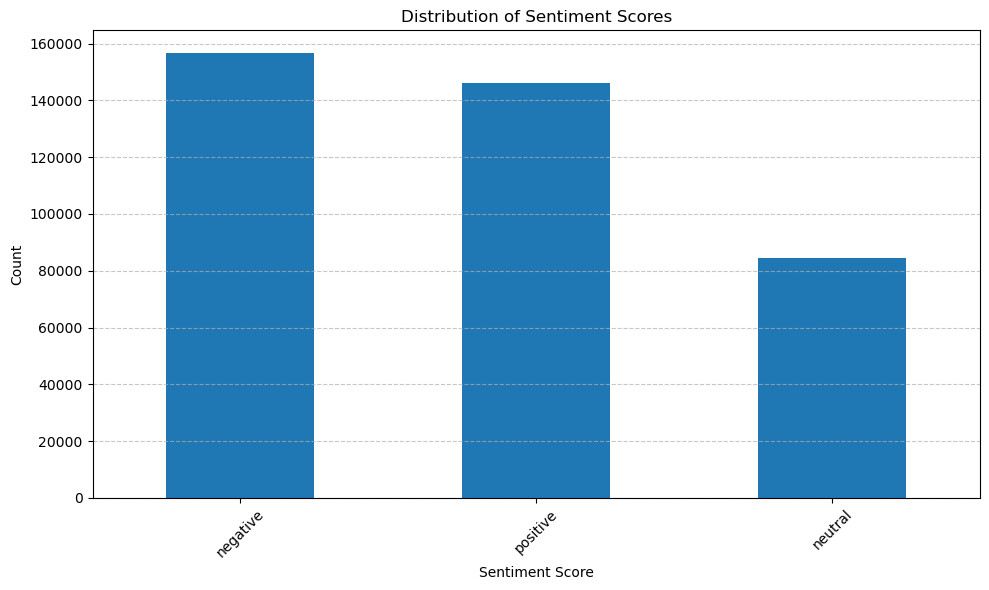

In [7]:
import matplotlib.pyplot as plt

# Get the sentiment score counts
sentiment_counts = filtered_df['sentiment_label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


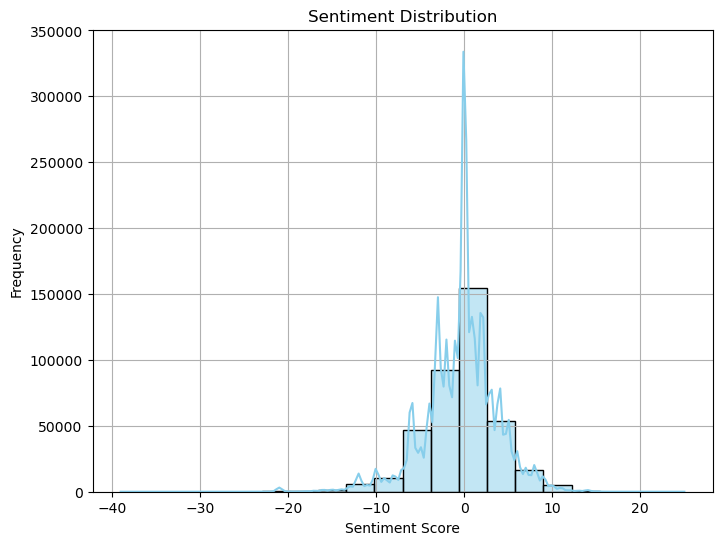

In [6]:
import seaborn as sns

# Plotting the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['sentiment_score'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## SVM Classifier for Sentiment Analysis
This code segment demonstrates the implementation of a Support Vector Machine (SVM) classifier for sentiment analysis.


In [4]:
# SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Assuming 'y' contains the target labels (sentiments)
y = filtered_df['sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

# Evaluate the SVM classifier
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy of SVM classifier:", accuracy)



Accuracy of SVM classifier: 0.9237177751125211


Confusion Matrix of SVM classifier:
[[29114  1352   910]
 [ 1045 15280   607]
 [  910  1091 27232]]


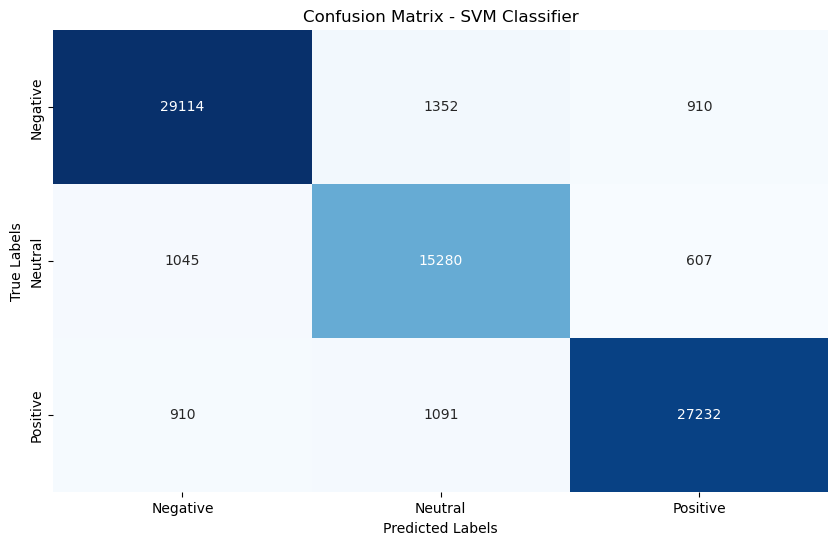

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
svm_predictions = svm_classifier.predict(X_test)

# Generate confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix of SVM classifier:")
print(svm_confusion_matrix)

# Define labels
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, svm_predictions, target_names=sentiment_labels)

# Print classification report
print("Classification Report: SVM \n", report)

Classification Report: SVM 
               precision    recall  f1-score   support

    Negative       0.94      0.93      0.93     31376
     Neutral       0.86      0.90      0.88     16932
    Positive       0.95      0.93      0.94     29233

    accuracy                           0.92     77541
   macro avg       0.92      0.92      0.92     77541
weighted avg       0.92      0.92      0.92     77541



## Multi-Layer Perceptron (MLP) Classifier for Sentiment Analysis
This code segment demonstrates the implementation of a Multi-Layer Perceptron (MLP) classifier for sentiment analysis.

Accuracy of MLP classifier: 0.9153995950529398


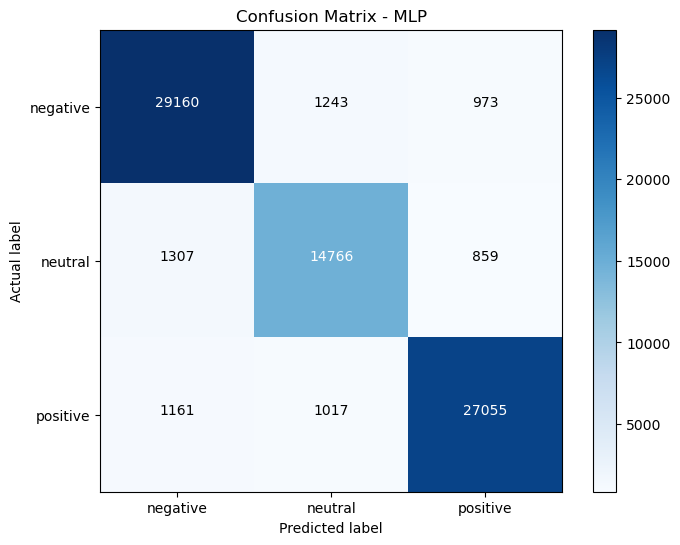

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


y = filtered_df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initializes and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp_classifier.fit(X_train, y_train)

# Evaluates the MLP classifier
accuracy = mlp_classifier.score(X_test, y_test)
print("Accuracy of MLP classifier:", accuracy)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generates predictions
predictions = mlp_classifier.predict(X_test)

# Generates confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plots confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - MLP')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()



In [10]:
from sklearn.metrics import classification_report
predictions = mlp_classifier.predict(X_test)
# Generate classification report
report = classification_report(y_test, predictions)

# Print classification report
print("Classification Report: MLP \n", report)


Classification Report: MLP 
               precision    recall  f1-score   support

    negative       0.93      0.93      0.93     31376
     neutral       0.86      0.88      0.87     16932
    positive       0.93      0.93      0.93     29233

    accuracy                           0.92     77541
   macro avg       0.91      0.91      0.91     77541
weighted avg       0.92      0.92      0.92     77541



In [9]:
from tkinter import Tk, Label, Entry, Button
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Function to preprocess text
def preprocess_text(text):
    # Apply text cleaning and negation handling
    cleaned_text = handle_negations(text)
    return cleaned_text

# Loads the trained MLP classifier and TF-IDF vectorizer
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp_classifier.fit(X_tfidf, y)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(cleaned_df['cleaned_text'])

# Function to predict sentiment
def predict_sentiment(text):
    # Preprocess the text
    cleaned_text = preprocess_text(text)
    
    # Vectorize the preprocessed text
    text_vector = tfidf_vectorizer.transform([cleaned_text])
    
    # Predict sentiment using the MLP classifier
    sentiment_label = mlp_classifier.predict(text_vector)[0]
    
    # Display result
    result_label.config(text="Predicted sentiment: " + sentiment_label)

# Create a Tkinter window
window = Tk()
window.title("Sentiment Analysis")

# Text entry widget
text_label = Label(window, text="Enter text:")
text_label.grid(row=0, column=0)
text_entry = Entry(window)
text_entry.grid(row=0, column=1)

# Button to predict sentiment
predict_button = Button(window, text="Predict", command=lambda: predict_sentiment(text_entry.get()))
predict_button.grid(row=1, columnspan=2)

# Label to display result
result_label = Label(window, text="")
result_label.grid(row=2, columnspan=2)

# Run the Tkinter event loop
window.mainloop()


## Random Forest and Gradient Boosting Classifiers for Sentiment Analysis
This code segment demonstrates the implementation of Random Forest and Gradient Boosting classifiers for sentiment analysis.

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy of Random Forest classifier:", rf_accuracy)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy of Gradient Boosting classifier:", gb_accuracy)


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report of Random Forest classifier:")
print(rf_classification_report)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_classification_report = classification_report(y_test, gb_predictions)
print("Classification Report of Gradient Boosting classifier:")
print(gb_classification_report)



Accuracy of Random Forest classifier: 0.9245302485136895
Accuracy of Gradient Boosting classifier: 0.7370810281012625
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

    negative       0.91      0.94      0.93     31376
     neutral       0.91      0.88      0.89     16932
    positive       0.95      0.93      0.94     29233

    accuracy                           0.92     77541
   macro avg       0.92      0.92      0.92     77541
weighted avg       0.92      0.92      0.92     77541

Classification Report of Gradient Boosting classifier:
              precision    recall  f1-score   support

    negative       0.68      0.85      0.76     31376
     neutral       0.67      0.54      0.60     16932
    positive       0.85      0.73      0.79     29233

    accuracy                           0.74     77541
   macro avg       0.74      0.71      0.72     77541
weighted avg       0.75      0.74      0.73     77541



Confusion Matrix of Random Forest classifier:
[[29486   883  1007]
 [ 1424 14973   535]
 [ 1317   686 27230]]
Confusion Matrix of Gradient Boosting classifier:
[[26584  2342  2450]
 [ 6527  9156  1249]
 [ 5740  2079 21414]]


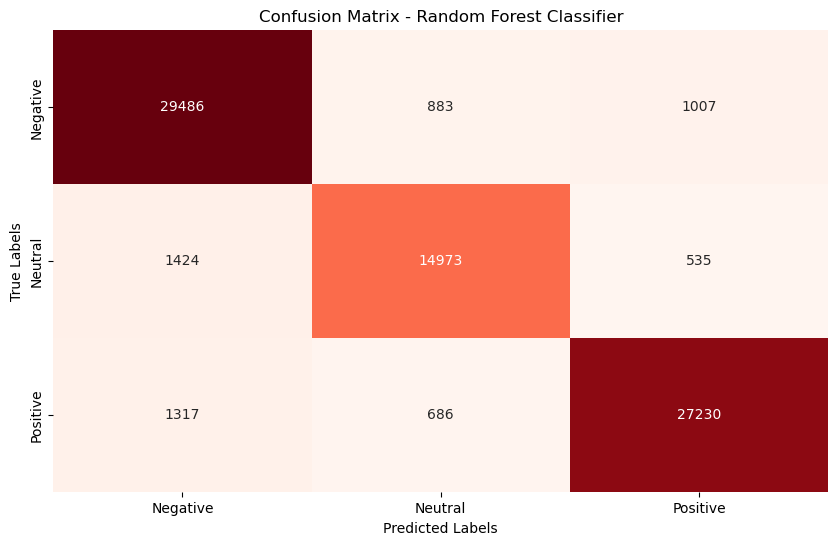

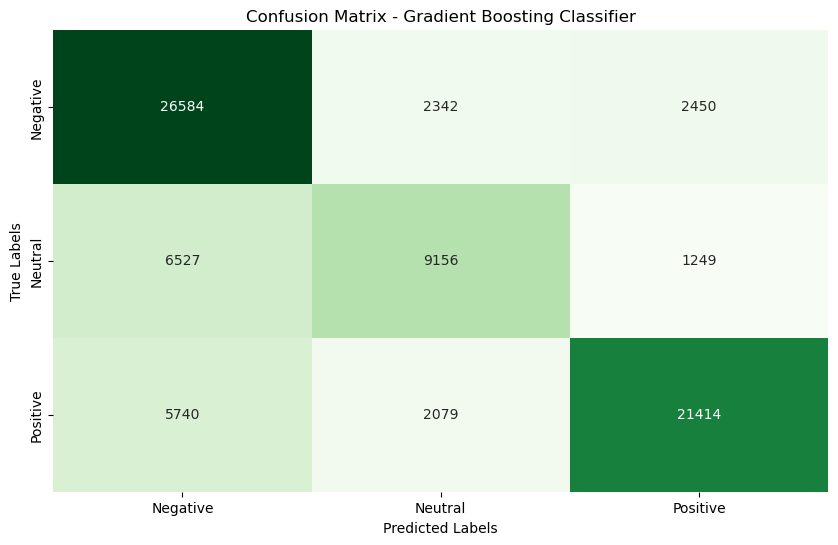

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated confusion matrices (rf_confusion_matrix, gb_confusion_matrix)

# Random Forest Classifier
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix of Random Forest classifier:")
print(rf_confusion_matrix)

# Gradient Boosting Classifier
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
print("Confusion Matrix of Gradient Boosting classifier:")
print(gb_confusion_matrix)

# Define labels
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Plotting Confusion Matrix for Random Forest Classifier
plt.figure(figsize=(10, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting Confusion Matrix for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.heatmap(gb_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
